# Set up environment

In [103]:
import pandas as pd
import re
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style("darkgrid")
% matplotlib inline

# Problem 1

### Load data:

In [104]:
df_orders = pd.read_csv('data/Orders.csv')
df_returns  = pd.read_csv('data/Returns.csv')

df_orders.columns

Index(['Row.ID', 'Order.ID', 'Order.Date', 'Ship.Date', 'Ship.Mode',
       'Customer.ID', 'Customer.Name', 'Segment', 'Postal.Code', 'City',
       'State', 'Country', 'Region', 'Market', 'Product.ID', 'Category',
       'Sub.Category', 'Product.Name', 'Sales', 'Quantity', 'Discount',
       'Profit', 'Shipping.Cost', 'Order.Priority'],
      dtype='object')

### Check "Profit" and "Sales" in the dataset, convert these two columns to numeric type.

In [105]:
print(df_orders.Profit.head())
print(df_orders.Sales.head())

df_orders.Profit = list(map(lambda x: float(x.replace("$", '').replace(",", '')), df_orders.Profit))
df_orders.Sales = list(map(lambda x: float(x.replace("$", '').replace(",", '')), df_orders.Sales))

# Also replace periods with underscored in column names
df_orders.columns = list(map(lambda x: x.replace(".","_"), df_orders.columns))

df_orders.Order_Date = pd.to_datetime(df_orders.Order_Date)

print(df_orders.Profit.head())
print(df_orders.Sales.head())
print(df_orders.columns)

0      $62.15
1    -$288.77
2     $919.97
3     -$96.54
4     $311.52
Name: Profit, dtype: object
0      $221.98
1    $3,709.40
2    $5,175.17
3    $2,892.51
4    $2,832.96
Name: Sales, dtype: object
0     62.15
1   -288.77
2    919.97
3    -96.54
4    311.52
Name: Profit, dtype: float64
0     221.98
1    3709.40
2    5175.17
3    2892.51
4    2832.96
Name: Sales, dtype: float64
Index(['Row_ID', 'Order_ID', 'Order_Date', 'Ship_Date', 'Ship_Mode',
       'Customer_ID', 'Customer_Name', 'Segment', 'Postal_Code', 'City',
       'State', 'Country', 'Region', 'Market', 'Product_ID', 'Category',
       'Sub_Category', 'Product_Name', 'Sales', 'Quantity', 'Discount',
       'Profit', 'Shipping_Cost', 'Order_Priority'],
      dtype='object')


### Is there any seasonal trend of inventory in the company?

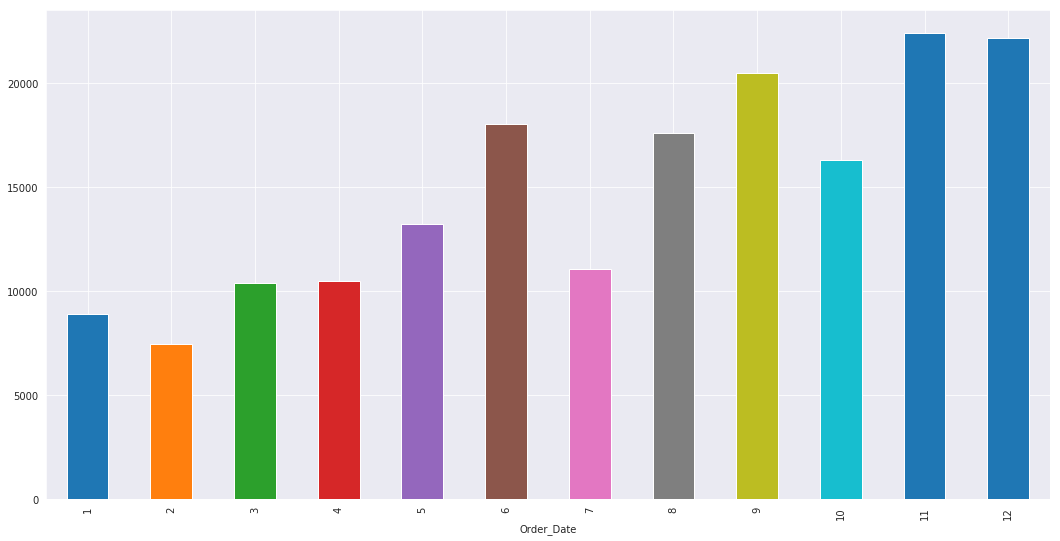

In [106]:
df_timeseries = df_orders[['Order_Date','Quantity']]
df_timeseries.index = df_timeseries.Order_Date

plt.rcParams['figure.figsize'] = 18, 9
df_timeseries.groupby(by=[df_timeseries.index.month]).sum().Quantity.plot(kind='bar')


Orders peak in November and December and are lowest in February. It increases during most of the year.

### Is the seasonal trend the same for different categories?

In [107]:
#df_timeseries.groupby(by=[df_timeseries.index.month]).sum().Quantity.plot(kind='line')

df_categorical = df_orders[['Order_Date', 'Category', 'Quantity']]

df_categorical = df_categorical.reset_index(drop=True)

df_categorical.index = df_categorical.Order_Date

df_categorical.head()

,Order_Date,Category,Quantity
Order_Date,,,
2014-11-11,2014-11-11,Technology,2
2014-02-05,2014-02-05,Furniture,9
2014-10-17,2014-10-17,Technology,9
2014-01-28,2014-01-28,Technology,5
2014-11-05,2014-11-05,Technology,8


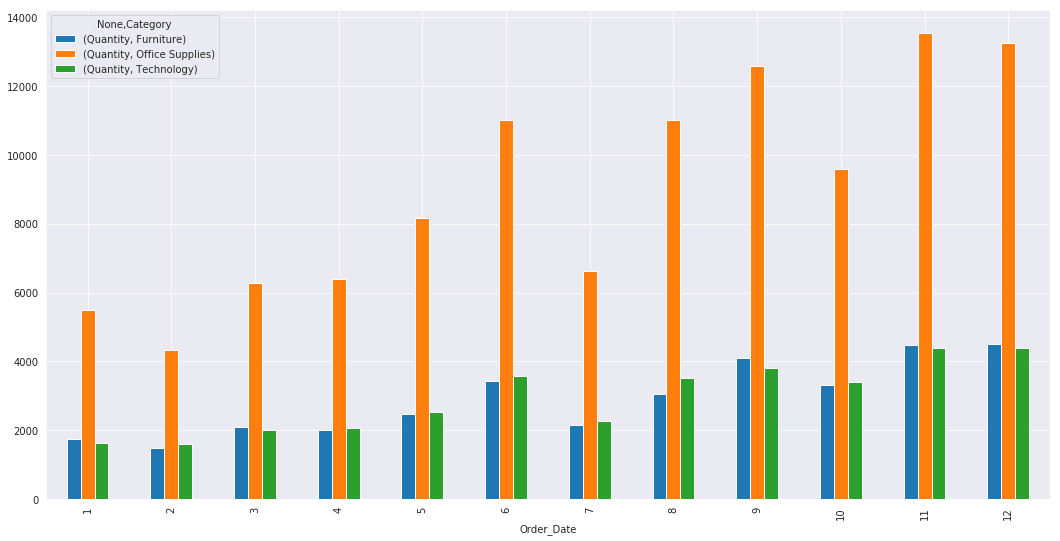

In [98]:
df_categorical.groupby([df_categorical.index.month, 'Category']).sum().unstack(fill_value=0).plot(kind='bar')

It appears all categories have the same seasonality, though Technology drops most in July.

# Problem 2

### How much profit did we lose due to returns each year?

In [109]:
df_returns.head()

,Returned,Order ID,Region
0,Yes,CA-2012-SA20830140-41210,Central US
1,Yes,IN-2012-PB19210127-41259,Eastern Asia
2,Yes,CA-2012-SC20095140-41174,Central US
3,Yes,IN-2015-JH158207-42140,Oceania
4,Yes,IN-2014-LC168857-41747,Oceania


In [153]:
combined_df = df_orders.merge(df_returns, left_on= "Order_ID", right_on="Order ID", how = "left")
combined_df.shape

combined_df['year'] = list(map(lambda x: x.year, combined_df['Order_Date']))

combined_df.head()

,Row_ID,Order_ID,Order_Date,Ship_Date,Ship_Mode,Customer_ID,Customer_Name,Segment,Postal_Code,City,...,Sales,Quantity,Discount,Profit,Shipping_Cost,Order_Priority,Returned,Order ID,Region_y,year
0,40098,CA-2014-AB10015140-41954,2014-11-11,11/13/14,First Class,AB-100151402,Aaron Bergman,Consumer,73120.0,Oklahoma City,...,221.98,2,0.0,62.15,40.77,High,NaN,NaN,NaN,2014
1,26341,IN-2014-JR162107-41675,2014-02-05,2/7/14,Second Class,JR-162107,Justin Ritter,Corporate,NaN,Wollongong,...,3709.40,9,0.1,-288.77,923.63,Critical,NaN,NaN,NaN,2014
2,25330,IN-2014-CR127307-41929,2014-10-17,10/18/14,First Class,CR-127307,Craig Reiter,Consumer,NaN,Brisbane,...,5175.17,9,0.1,919.97,915.49,Medium,NaN,NaN,NaN,2014
3,13524,ES-2014-KM1637548-41667,2014-01-28,1/30/14,First Class,KM-1637548,Katherine Murray,Home Office,NaN,Berlin,...,2892.51,5,0.1,-96.54,910.16,Medium,NaN,NaN,NaN,2014
4,47221,SG-2014-RH9495111-41948,2014-11-05,11/6/14,Same Day,RH-9495111,Rick Hansen,Consumer,NaN,Dakar,...,2832.96,8,0.0,311.52,903.04,Critical,NaN,NaN,NaN,2014


In [129]:
combined_df.loc[combined_df.Returned=='Yes'].groupby('year').Profit.sum()

year
2012    17477.26
2013     9269.89
2014    17510.63
2015    17112.97
Name: Profit, dtype: float64

### How many customer returned more than once? more than 5 times?

In [151]:
returners = combined_df.loc[(combined_df.Returned == 'Yes')].groupby("Customer_ID").size()

print(str(sum(returners > 1)) + ' customers have made multiple returns')

print(str(sum(returners > 5)) + " customers have made more than 5 returns")


547 customers have made multiple returns
46 customers have made more than 5 returns


### Which regions are more likely to return orders?


In [163]:
# Number of returns per region / Number of orders per region
regionalReturnTotal = combined_df.loc[(combined_df.Returned == 'Yes')].groupby("Region_x").size()
regionalReturnRate = regionalReturnTotal / combined_df.groupby("Region_x").size()
regionalReturnRate.sort_values()

Region_x
Eastern Africa       0.024725
Central Africa       0.026439
Eastern Europe       0.027469
Central US           0.031855
Northern Europe      0.034483
Canada               0.039062
Western Europe       0.039606
North Africa         0.039906
Caribbean            0.040828
Western Africa       0.041096
Central Asia         0.041475
Southern Asia        0.041808
Central America      0.044160
Oceania              0.044164
Western Asia         0.044262
South America        0.044511
Southeastern Asia    0.044743
Eastern US           0.047051
Southern US          0.051235
Southern Africa      0.052301
Southern Europe      0.053005
Eastern Asia         0.055181
Western US           0.055261
dtype: float64

### Which categories (sub-categories) of products are more likely to be returned?



In [164]:
regionalReturnTotal = combined_df.loc[(combined_df.Returned == 'Yes')].groupby("Category").size()
regionalReturnRate = regionalReturnTotal / combined_df.groupby("Category").size()
regionalReturnRate.sort_values()

Category
Office Supplies    0.043082
Furniture          0.043306
Technology         0.043881
dtype: float64